Source: Earth and Environmental Data Science


https://earth-env-data-science.github.io/lectures/xarray/xarray.html#coordinates-vs-data-variables

https://en.wikipedia.org/wiki/Argo_(oceanography)

In [3]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

In [4]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)> Size: 40B
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [5]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)> Size: 40B
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [7]:
da = xr.DataArray([9, 0, 2, 1, 0],
                  dims=['x'],
                  coords={'x': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)> Size: 40B
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 40B 10 20 30 40 50

In [8]:
da

<xarray.DataArray (x: 5)> Size: 40B
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 40B 10 20 30 40 50

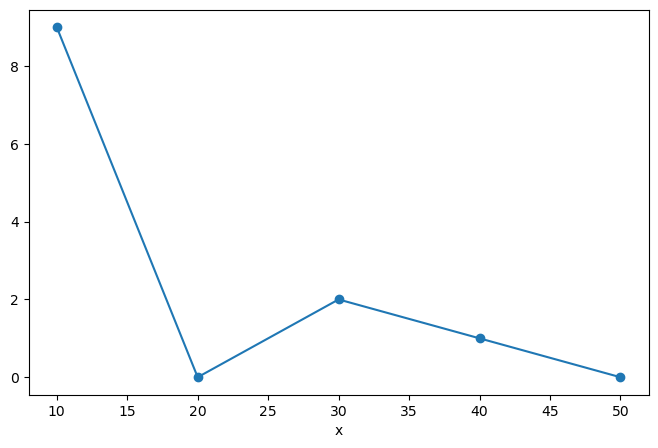

In [9]:
da.plot(marker='o')

ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one “profile” (a set of messurements at different depths or “levels”).

In [17]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files.sort()
files

['/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy']

In [18]:
P = np.load(files[0])
S = np.load(files[1])
T = np.load(files[2])
date = np.load(files[3])
lat = np.load(files[4])
levels = np.load(files[5])
lon = np.load(files[6])

In [21]:
T

array([[18.97400093, 18.43700027, 19.09900093, ..., 19.11300087,
        21.82299995, 20.13100052],
       [18.74099922, 18.39999962, 19.08200073, ..., 18.47200012,
        19.45999908, 20.125     ],
       [18.37000084, 18.37400055, 19.06500053, ..., 18.22999954,
        19.26199913, 20.07699966],
       ...,
       [ 3.79299998,  3.81399989,  3.80200005, ...,  3.80699992,
         3.81100011,  3.8599999 ],
       [ 3.76399994,  3.77800012,  3.75699997, ...,  3.75399995,
         3.74600005,  3.80599999],
       [ 3.74399996,  3.74600005,  3.7249999 , ...,         nan,
         3.71399999,         nan]])

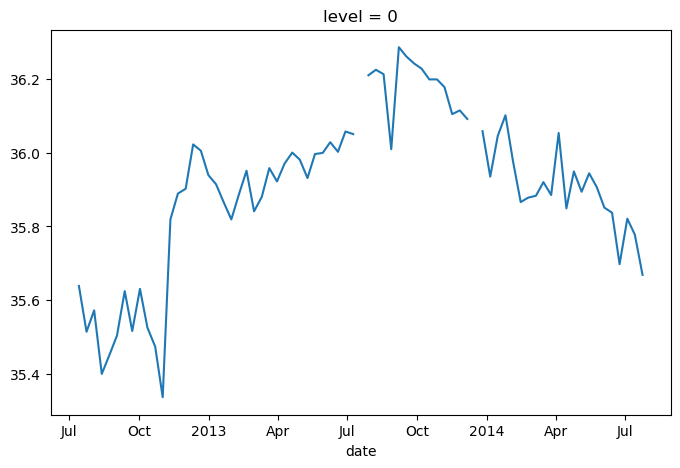

In [29]:
da_salinity = xr.DataArray(S, dims=['level', 'date'],
                           coords={'level': levels,
                                   'date': date},)
da_salinity.sel(level = 0).plot()

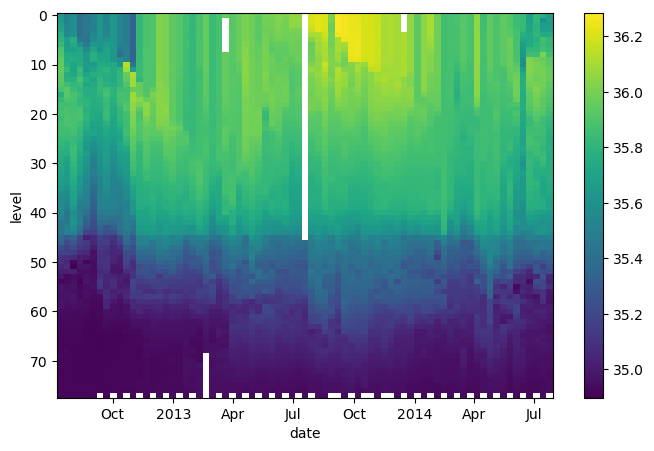

In [14]:
da_salinity.plot(yincrease=False)

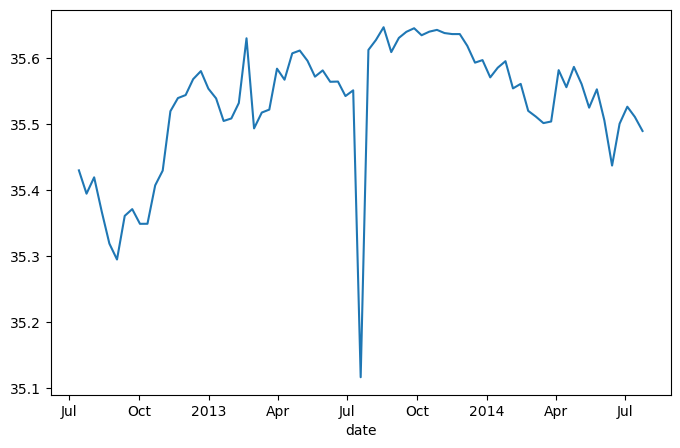

In [17]:
da_salinity.mean(dim = "level", skipna=True).plot()

In [30]:
da_salinity.attrs['units'] = 'PSU'
da_salinity.attrs['standard_name'] = 'sea_water_salinity'
da_salinity

<xarray.DataArray (level: 78, date: 75)> Size: 47kB
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * level    (level) int64 624B 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 2014-0...
Attributes:
    units:          PSU
    standard_name:  sea_water_salinity

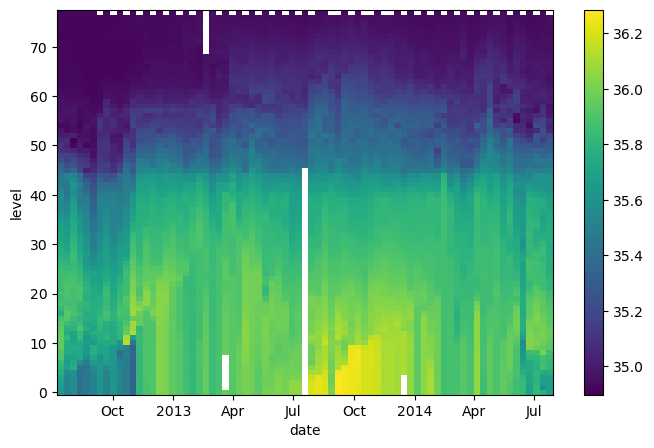

In [18]:
da_salinity.plot()


In [32]:

da_salinity = xr.DataArray(S, 
                           dims=['level', 'date'],
                           coords={'level': levels,
                                   'date': date},)


argo = xr.Dataset(
    data_vars={
        'salinity':    (('level', 'date'), S),
        'temperature': (('level', 'date'), T),
        'pressure':    (('level', 'date'), P)
    },
    coords={
        'level': levels,
        'date': date
    }
)

argo


<xarray.Dataset> Size: 142kB
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 624B 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 20...
Data variables:
    salinity     (level, date) float64 47kB 35.64 35.51 35.57 ... nan 34.94 nan
    temperature  (level, date) float64 47kB 18.97 18.44 19.1 ... nan 3.714 nan
    pressure     (level, date) float64 47kB 6.8 6.1 6.5 5.0 ... nan 2e+03 nan

In [24]:
argo.coords['lon'] = lon
argo

<xarray.Dataset> Size: 142kB
Dimensions:      (level: 78, date: 75, lon: 75)
Coordinates:
  * level        (level) int64 624B 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 20...
  * lon          (lon) float64 600B -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
Data variables:
    salinity     (level, date) float64 47kB 35.64 35.51 35.57 ... nan 34.94 nan
    temperature  (level, date) float64 47kB 18.97 18.44 19.1 ... nan 3.714 nan
    pressure     (level, date) float64 47kB 6.8 6.1 6.5 5.0 ... nan 2e+03 nan

In [33]:
del argo['lon']
argo.coords['lon'] = ('date', lon)
argo.coords['lat'] = ('date', lat)
argo.isel(level = 0)

KeyError: 'lon'

Dimension coordinate


A one-dimensional coordinate array assigned to arr with both a name and dimension name in arr.dims. Usually (but not always), a dimension coordinate is also an Indexed coordinate so that it can be used for label-based indexing and alignment, like the index found on a pandas.DataFrame or pandas.Series.

In [32]:
argo.reset_coords("lat")
argo.swap_dims({"date": "lon"})

<xarray.Dataset> Size: 143kB
Dimensions:      (level: 78, lon: 75)
Coordinates:
  * level        (level) int64 624B 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76 77
    date         (lon) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 201...
    lat          (lon) float64 600B 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
  * lon          (lon) float64 600B -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
Data variables:
    salinity     (level, lon) float64 47kB 35.64 35.51 35.57 ... nan 34.94 nan
    temperature  (level, lon) float64 47kB 18.97 18.44 19.1 ... nan 3.714 nan
    pressure     (level, lon) float64 47kB 6.8 6.1 6.5 5.0 ... nan 2e+03 nan

In [33]:
argo = argo.set_coords(['lon', 'lat'])
argo

<xarray.Dataset> Size: 143kB
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 624B 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 20...
    lat          (date) float64 600B 47.19 46.72 46.45 ... 42.6 42.46 42.38
    lon          (date) float64 600B -39.13 -37.28 -36.9 ... -34.11 -34.38
Data variables:
    salinity     (level, date) float64 47kB 35.64 35.51 35.57 ... nan 34.94 nan
    temperature  (level, date) float64 47kB 18.97 18.44 19.1 ... nan 3.714 nan
    pressure     (level, date) float64 47kB 6.8 6.1 6.5 5.0 ... nan 2e+03 nan

In [35]:
argo

<xarray.Dataset> Size: 142kB
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 624B 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 20...
Data variables:
    salinity     (level, date) float64 47kB 35.64 35.51 35.57 ... nan 34.94 nan
    temperature  (level, date) float64 47kB 18.97 18.44 19.1 ... nan 3.714 nan
    pressure     (level, date) float64 47kB 6.8 6.1 6.5 5.0 ... nan 2e+03 nan

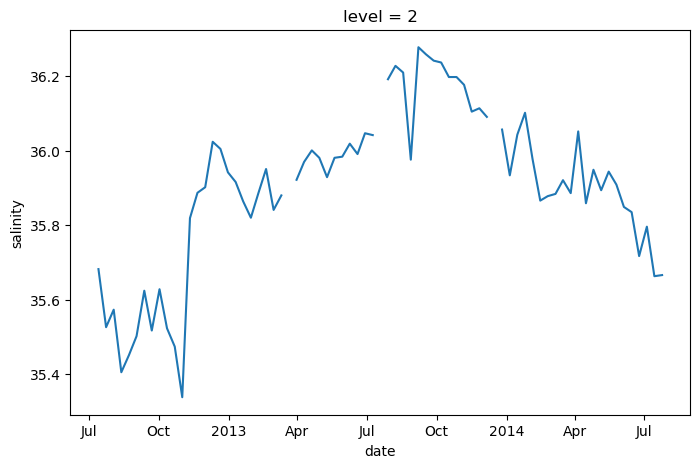

In [35]:
argo.salinity[2].plot()

In [ ]:
argo.salinity[:, 10].plot()

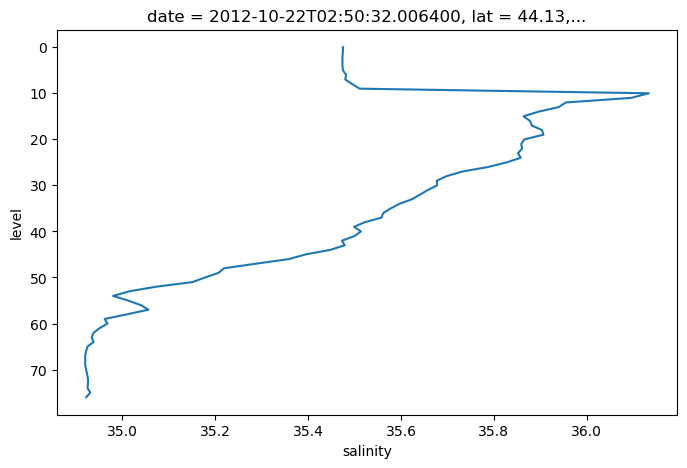

In [39]:
argo.salinity.sel(date='2012-10-22').plot(y='level', yincrease=False)

In [34]:
argo.salinity.sel(date=slice('2012-10-01', '2012-12-01'))

<xarray.DataArray 'salinity' (level: 78, date: 7)> Size: 4kB
array([[35.63097763, 35.52592468, 35.47483063, 35.33785629, 35.81896591,
        35.8889389 , 35.90187836],
       [35.63097763, 35.52292252, 35.47483063, 35.33685684, 35.81796646,
        35.88793945, 35.90187836],
       [35.62797546, 35.52292252, 35.47383118, 35.33785629, 35.81896591,
        35.88694   , 35.90187836],
       [35.62697601, 35.52192307, 35.47383118, 35.33785629, 35.81896591,
        35.89193726, 35.90187836],
       [35.62797546, 35.52192307, 35.47383118, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.62897873, 35.52292252, 35.47483063, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.62997818, 35.51892471, 35.48183441, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.63197708, 35.44991302, 35.47983551, 35.33785629, 35.81996536,
        35.89683914, 35.90187836],
       [35.63097763, 35.38090134, 35.4948349 , 35.33785629, 35.81896591,
        35.89583969, 35.90187836],
       [35.62697601, 35.58792114, 35.51083755, 35.33985519, 35.82497025,
        35.89683914, 35.90187836],
...
       [34.91690445, 34.92385483, 34.91975403, 34.91980362, 34.92385483,
        34.93680573, 34.93885422],
       [34.92190552, 34.92485428, 34.91975403, 34.92080688, 34.92485428,
        34.94480515, 34.9328537 ],
       [34.92390442, 34.92285538, 34.92176056, 34.92280579, 34.92985535,
        34.93280411, 34.92785645],
       [34.92390442, 34.92385483, 34.92375946, 34.92480469, 34.92685318,
        34.93780899, 34.92485428],
       [34.92390442, 34.92285538, 34.92575836, 34.92181015, 34.92085648,
        34.93680954, 34.92385483],
       [34.92590332, 34.9288559 , 34.92575836, 34.92181015, 34.92685318,
        34.93481064, 34.92585373],
       [34.92490387, 34.92785645, 34.92475891, 34.92781067, 34.93385696,
        34.93380737, 34.92385864],
       [34.92190552, 34.92385864, 34.93076324, 34.9268074 , 34.93585968,
        34.93481064, 34.92985916],
       [34.92090607, 34.92185974, 34.92176437, 34.9228096 , 34.93285751,
        34.93180847, 34.92786026],
       [        nan, 34.91985703,         nan, 34.92181015,         nan,
        34.92181015,         nan]])
Coordinates:
  * level    (level) int64 624B 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 56B 2012-10-02T03:00:17.971200 ... 2012-12...

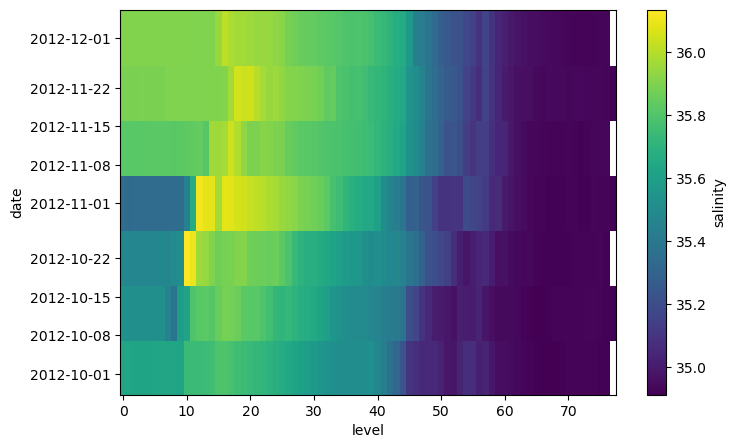

In [49]:
argo.salinity.sel(date=slice('2012-10-01', '2012-12-01')).plot(y = "date", x = 'level')

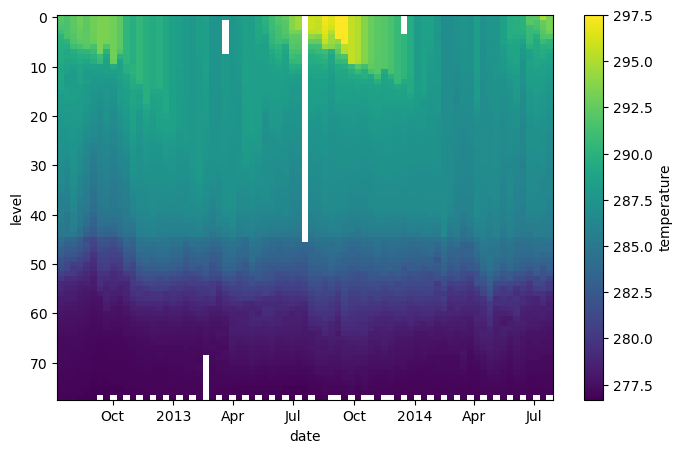

In [51]:
temp_kelvin = argo.temperature + 273.15
temp_kelvin.plot(yincrease=False)


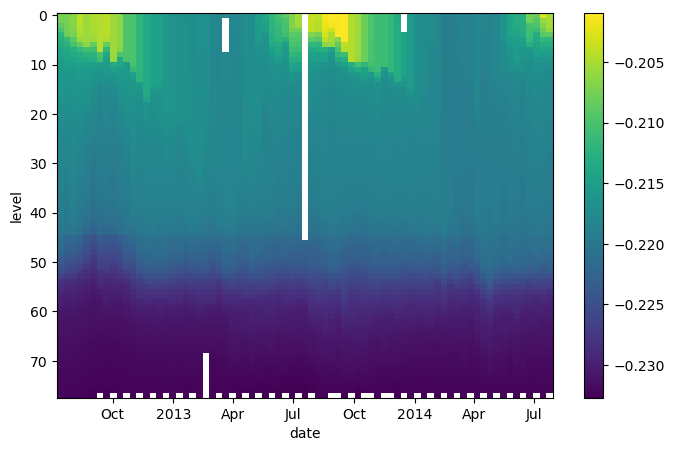

In [52]:
g = 9.8
buoyancy = g * (2e-4 * argo.temperature - 7e-4 * argo.salinity)
buoyancy.plot(yincrease=False)

In [56]:
argo

<xarray.Dataset> Size: 143kB
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 624B 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 20...
    lat          (date) float64 600B 47.19 46.72 46.45 ... 42.6 42.46 42.38
    lon          (date) float64 600B -39.13 -37.28 -36.9 ... -34.11 -34.38
Data variables:
    salinity     (level, date) float64 47kB 35.64 35.51 35.57 ... nan 34.94 nan
    temperature  (level, date) float64 47kB 18.97 18.44 19.1 ... nan 3.714 nan
    pressure     (level, date) float64 47kB 6.8 6.1 6.5 5.0 ... nan 2e+03 nan

In [58]:
level_times_lat = argo.level * argo.lat
level_times_lat.shape

(78, 75)

In [60]:
level_times_lat = argo.level[:75] * argo.lat
level_times_lat

<xarray.DataArray (level: 75, date: 75)> Size: 45kB
array([[   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [  47.187,   46.716,   46.45 , ...,   42.601,   42.457,   42.379],
       [  94.374,   93.432,   92.9  , ...,   85.202,   84.914,   84.758],
       ...,
       [3397.464, 3363.552, 3344.4  , ..., 3067.272, 3056.904, 3051.288],
       [3444.651, 3410.268, 3390.85 , ..., 3109.873, 3099.361, 3093.667],
       [3491.838, 3456.984, 3437.3  , ..., 3152.474, 3141.818, 3136.046]])
Coordinates:
  * level    (level) int64 600B 0 1 2 3 4 5 6 7 8 ... 66 67 68 69 70 71 72 73 74
  * date     (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 2014-0...
    lat      (date) float64 600B 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
    lon      (date) float64 600B -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38

In [61]:
level_times_lat = argo.level[:75] * argo.level[:75]
level_times_lat

<xarray.DataArray 'level' (level: 75)> Size: 600B
array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476])
Coordinates:
  * level    (level) int64 600B 0 1 2 3 4 5 6 7 8 ... 66 67 68 69 70 71 72 73 74

In [63]:
sa_surf = argo.salinity.isel(level=slice(0, 20))
sa_mid = argo.salinity.isel(level=slice(10, 30))

sa_mid.level

<xarray.DataArray 'level' (level: 20)> Size: 160B
array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29])
Coordinates:
  * level    (level) int64 160B 10 11 12 13 14 15 16 17 ... 23 24 25 26 27 28 29

In [64]:
(sa_surf * sa_mid).level

<xarray.DataArray 'level' (level: 10)> Size: 80B
array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
Coordinates:
  * level    (level) int64 80B 10 11 12 13 14 15 16 17 18 19

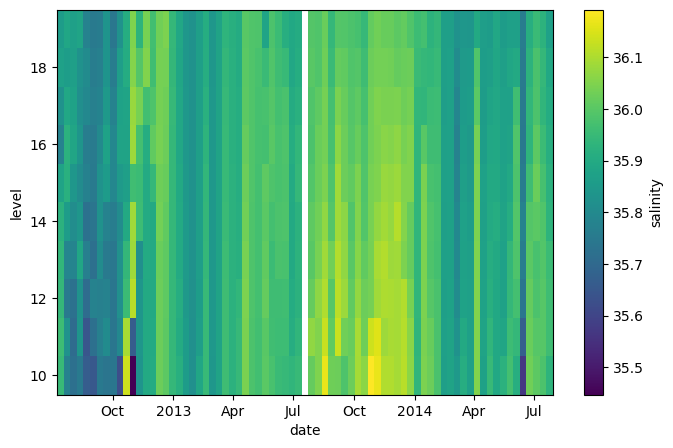

In [75]:
sa_surf_outer, sa_mid_outer = xr.align(sa_surf, sa_mid)
sa_surf_outer.plot()

In [ ]:
sa_surf_outer.plot(yincrease=False)

In [70]:
x = xr.DataArray(
    [[25, 35], [10, 24]],
    dims=("lat", "lon"),
    coords={"lat": [35.0, 40.0], "lon": [100.0, 120.0]},
)
y = xr.DataArray(
    [[20, 5], [7, 13]],
    dims=("lat", "lon"),
    coords={"lat": [35.0, 42.0], "lon": [100.0, 120.0]},
)
#a, b = xr.align(x, y)
a, b = xr.align(x, y, join="outer")

In [66]:
x

<xarray.DataArray (lat: 2, lon: 2)> Size: 32B
array([[25, 35],
       [10, 24]])
Coordinates:
  * lat      (lat) float64 16B 35.0 40.0
  * lon      (lon) float64 16B 100.0 120.0

In [72]:
y
#a, b = xr.align(x, y)
b

<xarray.DataArray (lat: 3, lon: 2)> Size: 48B
array([[20.,  5.],
       [nan, nan],
       [ 7., 13.]])
Coordinates:
  * lat      (lat) float64 24B 35.0 40.0 42.0
  * lon      (lon) float64 16B 100.0 120.0

In [95]:
sa_surf_mid = xr.concat([sa_mid,sa_surf], dim='level')
sa_surf_mid

<xarray.DataArray 'salinity' (level: 40, date: 75)> Size: 24kB
array([[35.94787979, 35.77099228, 35.7189827 , ..., 36.00383759,
        35.97983551, 35.92783737],
       [35.95887756, 35.82500458, 35.70597839, ..., 35.99683762,
        35.9948349 , 35.96183395],
       [35.94387817, 35.75198364, 35.72397995, ..., 35.98183441,
        35.9948349 , 35.95983124],
       ...,
       [35.82796097, 35.89001465, 35.87601089, ..., 35.98083115,
        35.93483353, 35.90393066],
       [35.86996841, 35.85800934, 35.86500931, ..., 35.97883224,
        35.9418335 , 35.89392853],
       [35.85496521, 35.88801575, 35.86801147, ..., 35.95183182,
        35.92483139, 35.86992264]])
Coordinates:
  * level    (level) int64 320B 10 11 12 13 14 15 16 17 ... 13 14 15 16 17 18 19
  * date     (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 2014-0...
    lat      (date) float64 600B 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
    lon      (date) float64 600B -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38

In [ ]:
sa_surf_mid.level

In [ ]:
sa_concat_new = xr.concat([sa_surf, sa_mid], dim='newdim')
sa_concat_new

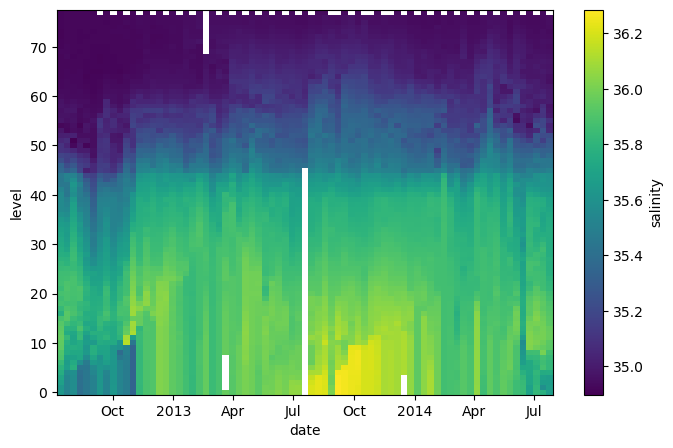

In [89]:
xr.merge([argo.salinity, argo.temperature]).salinity.plot()

In [ ]:
argo.temperature.mean(axis=0)


In [98]:
argo_mean = argo.std(dim='level')
#argo_mean

In [37]:
argo_mean = argo.mean(dim='date')
argo_mean

<xarray.Dataset> Size: 2kB
Dimensions:      (level: 78)
Coordinates:
  * level        (level) int64 624B 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level) float64 624B 35.91 35.9 35.9 35.9 ... 34.94 34.94 34.93
    temperature  (level) float64 624B 17.6 17.57 17.51 ... 3.789 3.73 3.662
    pressure     (level) float64 624B 6.435 10.57 15.54 ... 1.95e+03 1.999e+03

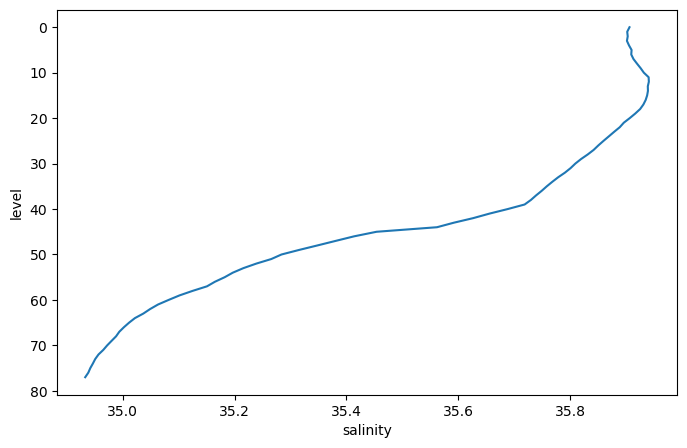

In [38]:
argo_mean.salinity.plot(y='level', yincrease=False)

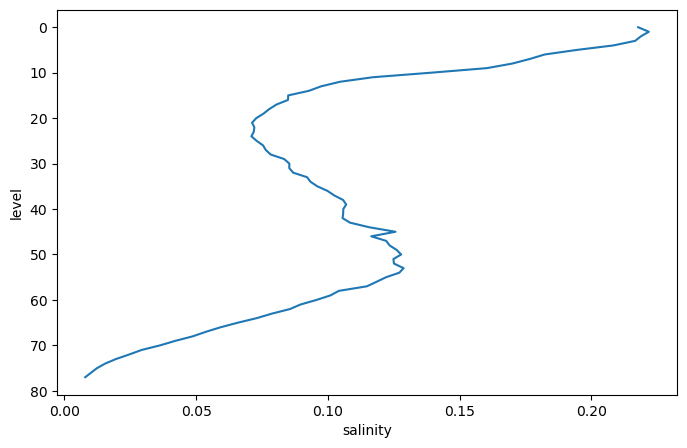

In [102]:
argo_std = argo.std(dim='date')
argo_std.salinity.plot(y='level', yincrease=False)

In [105]:
mean_pressure = argo.pressure.mean(dim='date')
p0 = 250  # dbat
weights = np.exp(-mean_pressure / p0)
weights.shape

(78,)

In [106]:
argo.temperature

<xarray.DataArray 'temperature' (level: 78, date: 75)> Size: 47kB
array([[18.97400093, 18.43700027, 19.09900093, ..., 19.11300087,
        21.82299995, 20.13100052],
       [18.74099922, 18.39999962, 19.08200073, ..., 18.47200012,
        19.45999908, 20.125     ],
       [18.37000084, 18.37400055, 19.06500053, ..., 18.22999954,
        19.26199913, 20.07699966],
       ...,
       [ 3.79299998,  3.81399989,  3.80200005, ...,  3.80699992,
         3.81100011,  3.8599999 ],
       [ 3.76399994,  3.77800012,  3.75699997, ...,  3.75399995,
         3.74600005,  3.80599999],
       [ 3.74399996,  3.74600005,  3.7249999 , ...,         nan,
         3.71399999,         nan]])
Coordinates:
  * level    (level) int64 624B 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 2014-0...
    lat      (date) float64 600B 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
    lon      (date) float64 600B -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38

In [110]:
temp_weighted_mean = argo.temperature.weighted(weights).mean('level')
temp_weighted_mean
#argo.temperature.weighted(weights)

<xarray.DataArray 'temperature' (date: 75)> Size: 600B
array([15.3064288 , 15.17244033, 15.53097624, 15.60614246, 15.19365777,
       15.06437513, 15.49910817, 15.32765955, 15.53962091, 15.35364982,
       15.15441128, 15.37314421, 15.59709921, 15.60370826, 15.25868744,
       15.46913486, 15.24661329, 14.84747354, 14.57769572, 14.4386634 ,
       14.31716213, 14.58598594, 14.57257278, 13.96624778, 13.92211447,
       14.23043875, 14.19172288, 14.22712042, 14.71722637, 14.69467507,
       14.84337214, 14.74565419, 15.2082696 , 15.39783854, 15.28917789,
       15.85671254, 15.93391728,  8.81497191, 16.32055487, 16.32654209,
       16.95252704, 16.42001411, 17.0746503 , 17.397575  , 17.32842256,
       17.19800404, 16.62445163, 16.46603214, 16.40695869, 16.10286546,
       16.0546739 , 15.75371589, 15.18104474, 15.1641601 , 14.43177661,
       14.60686835, 14.45633964, 14.19997815, 13.6050319 , 13.47358563,
       13.37310503, 13.53798381, 13.48876823, 14.30468259, 13.64154769,
       13.82564296, 13.92794172, 14.08970902, 14.5768643 , 14.62863196,
       14.07911724, 15.07985399, 15.15664139, 15.4605823 , 15.27534293])
Coordinates:
  * date     (date) datetime64[ns] 600B 2012-07-13T22:33:06.019200 ... 2014-0...
    lat      (date) float64 600B 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
    lon      (date) float64 600B -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38

In [ ]:
temp_weighted_mean.plot(label='weighted')
argo.temperature.mean(dim='level').plot(label='unweighted')
plt.legend()